In [1]:
import pandas as pd 
import numpy as np 

In [3]:
from google.colab import files 
uploade = files.upload()

Saving Dataset_Titanic.csv to Dataset_Titanic.csv


In [4]:
nome_arquivo = "Dataset_Titanic.csv"
data_frame = pd.read_csv(nome_arquivo,sep=',')

In [5]:
data_frame.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
from sklearn import preprocessing 

In [9]:
fare_scaled = preprocessing.scale(data_frame['Fare'])

In [10]:
data_frame['fare_scaled'] = fare_scaled

In [11]:
data_frame.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,-0.486337


In [12]:
min_fare = data_frame['Fare'].min()

In [13]:
max_fare = data_frame['Fare'].max()

In [14]:
data_frame['normalized_fara'] = data_frame['Fare'].apply(lambda x: ((x-min_fare)/(max_fare-min_fare)))

In [15]:
data_frame['normalized_fara'].min()

0.0

In [16]:
data_frame['normalized_fara'].max()

1.0

In [17]:
data_frame['fare_scaled'].min()

-0.6484216535389205

In [18]:
min_max = preprocessing.MinMaxScaler()

In [19]:
min_max.transform(range())

TypeError: ignored

In [20]:
one_hot = pd.get_dummies(data_frame['Sex']) 

In [21]:
one_hot

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [22]:
data_frame = data_frame.join(one_hot)

In [23]:
data_frame.isnull().sum() * 100 / 891

PassengerId         0.000000
Survived            0.000000
Pclass              0.000000
Name                0.000000
Sex                 0.000000
Age                19.865320
SibSp               0.000000
Parch               0.000000
Ticket              0.000000
Fare                0.000000
Cabin              77.104377
Embarked            0.224467
fare_scaled         0.000000
normalized_fara     0.000000
female              0.000000
male                0.000000
dtype: float64

In [24]:
mean_age = data_frame['Age'].mean()

In [25]:
mean_age 

29.69911764705882

In [26]:
data_frame.dropna(subset=['Age'],axis=0,inplace=True)

In [27]:
data_frame.isnull().sum() * 100 / 891

PassengerId         0.000000
Survived            0.000000
Pclass              0.000000
Name                0.000000
Sex                 0.000000
Age                 0.000000
SibSp               0.000000
Parch               0.000000
Ticket              0.000000
Fare                0.000000
Cabin              59.371493
Embarked            0.224467
fare_scaled         0.000000
normalized_fara     0.000000
female              0.000000
male                0.000000
dtype: float64

In [28]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


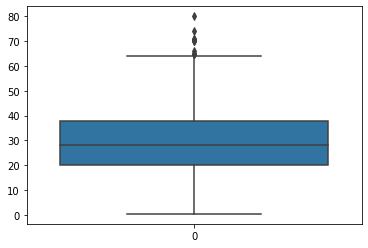

In [29]:
ax = sns.boxplot(data=data_frame['Age'])

In [30]:
from sklearn.linear_model  import LogisticRegression

In [31]:
x = data_frame[['Age','Fare','female','male']]

In [33]:
y = data_frame['Survived']

In [34]:
model = LogisticRegression(random_state= 0).fit(x,y)

In [35]:
pred = model.predict(x)

In [36]:
print('Y = {}X {}'.format(model.coef_,model.intercept_))

Y = [[-0.01072668  0.01278526  1.07563789 -1.23073824]]X [-0.16075931]


In [ ]:
model.score(x,y)

0.7773109243697479

In [51]:
pessoa = np.array([22,7.2500,0,1])

In [52]:
pred = model.predict(pessoa.reshape(1, -1))


In [53]:
pred


array([0])

In [55]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))